#### Collocate and cut imagery

In [1]:
with open('../env.txt') as f:
    ENVIRONMENT = f.readlines()[0][:-1]
print(f'running on environment: "{ENVIRONMENT}"')
assert ENVIRONMENT in ['blaze',
                       'colab',
                       'local',
                       'cpom']


running on environment: "local"


In [2]:
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

sys.path.append(os.path.expanduser('~/.snap/snap-python'))
import snappy
from snappy import ProductIO
from snappy import jpy
HashMap = snappy.jpy.get_type('java.util.HashMap')

sys.path.append('../')
import sis_toolbox as helper
import preprocessing.snap_toolbox as snap_toolbox

if ENVIRONMENT == 'cpom':
    PATH_DATA = '/home/cb/sis2/data/'
elif ENVIRONMENT == 'local':
    PATH_DATA = '/Users/christianboehm/projects/sis2/data/'


INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: GDAL not found on system. Internal GDAL 3.0.0 from distribution will be used. (f1)
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Internal GDAL 3.0.0 set to be used by SNAP.
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP experience.


In [3]:

TILESIZE = 256


In [4]:
img_pairs_inventory = pd.read_csv(os.path.join(PATH_DATA, 'inventory/img_pairs.csv'), index_col='index')
img_pairs_inventory.head(15)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/christianboehm/projects/sis2/data/inventory/img_pairs.csv'

In [5]:
# for index, row in img_pairs_inventory.iterrows():
#     S2_FILE = row['s2']
#     S3_FILE = row['s3']
#     s2_raw = ProductIO.readProduct(S2_FILE)
#     s3_raw = ProductIO.readProduct(S3_FILE)
#     overlap = snap_toolbox.check_overlap(s2_raw, s3_raw)
#     img_pairs_inventory.loc[index, 'overlap'] = round(overlap,2)
#     s2_raw.dispose()
#     s3_raw.dispose()

In [6]:
PAIR_INDEX = 13

In [7]:
### DO ALL FOLLOWING ONLY IF STATUS = NEW
pd.isna(img_pairs_inventory['status'].iloc[PAIR_INDEX]) or img_pairs_inventory['status'].iloc[PAIR_INDEX] == 'new'


False

In [8]:
row = img_pairs_inventory.iloc[PAIR_INDEX]

S2_FILE = row['s2']
S3_FILE = row['s3']
print(row['s2'])
print(row['s3'])

/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_2/DATA/S2B_MSIL1C_20220428T173859_N0400_R098_T17XPA_20220428T205006.SAFE
/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_3/OLCI/2022/04/S3A_OL_1_EFR____20220428T152128_20220428T152428_20220429T200056_0179_084_339_1800_MAR_O_NT_002.SEN3


In [5]:
### LOCAL ONLY!!!
S2_FILE = '/Users/christianboehm/projects/sis2/data/sample_00013/S2B_MSIL1C_20220428T173859_N0400_R098_T17XPA_20220428T205006.SAFE'
S3_FILE = '/Users/christianboehm/projects/sis2/data/sample_00013/S3A_OL_1_EFR____20220428T152128_20220428T152428_20220429T200056_0179_084_339_1800_MAR_O_NT_002.SEN3'

In [6]:
# def get_collocated_image(S2_FILE, S3_FILE):

# Reading raw images
s2_raw = ProductIO.readProduct(S2_FILE)
s3_raw = ProductIO.readProduct(S3_FILE)


INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Internal GDAL 3.0.0 set to be used by SNAP.
INFO: org.esa.s2tbx.dataio.s2.ortho.S2OrthoProductReaderPlugIn: Building product reader - EPSG:32617
INFO: org.hsqldb.persist.Logger: dataFileCache open start


In [7]:
overlap = snap_toolbox.check_overlap(s2_raw, s3_raw, 'metadata.s2', 'metadata.s3')
print(overlap)

img_pairs_inventory.loc[PAIR_INDEX, 'possible overlap'] = overlap

0.9999999999999997


NameError: name 'img_pairs_inventory' is not defined

In [8]:
polygon_real_s2 = snap_toolbox.get_metadata_polygon(s2_raw, 's2')


In [9]:
polygon_real_s3 = snap_toolbox.get_metadata_polygon(s3_raw, 's3')


In [10]:
### Do all following only if overlap == 1.0

if overlap < 1:
    img_pairs_inventory.loc[PAIR_INDEX, 'status'] = 'no overlap'

NameError: name 'img_pairs_inventory' is not defined

In [14]:
img_pairs_inventory

,s2,s2_date,s3,s3_date,delta,status_0704,possible overlap,overlap,status
index,,,,,,,,,
0,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-26 17:49:11,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-27 17:25:38,0 days 23:36:27,no overlap,0.0000,1.00,tifs created
1,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-26 17:49:11,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-27 15:47:39,0 days 21:58:28,tifs created,1.0000,0.06,overlap <90%
2,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-26 17:49:11,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-27 15:44:39,0 days 21:55:28,tifs created,1.0000,0.94,tifs created
3,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-26 17:49:11,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-26 17:51:49,0 days 00:02:38,no overlap,0.0000,0.99,tifs created
4,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-26 17:49:11,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-26 16:13:50,0 days 01:35:21,tifs created,1.0000,0.00,overlap <90%
...,...,...,...,...,...,...,...,...,...
276,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-02 17:18:49,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-02 18:14:13,0 days 00:55:24,no overlap,0.0000,0.03,overlap <90%
277,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-02 17:18:49,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-02 16:36:14,0 days 00:42:35,no overlap,0.0000,0.00,overlap <90%
278,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-02 17:18:49,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-02 16:33:14,0 days 00:45:35,tifs created,1.0000,1.00,new


In [15]:
# snap_toolbox.plot_tile(s2_raw)

In [11]:
s2_bands = snap_toolbox.band_subset(s2_raw, 'B2,B3,B4,B_opaque_clouds')
# s2_bands = snap_toolbox.band_subset(s2_raw, 'B2,B3,B4')
# snap.plot_tile(s2_bands)



100% done.


In [12]:

s3_bands = snap_toolbox.band_subset(s3_raw, 'Oa01_radiance,Oa02_radiance,Oa03_radiance,Oa04_radiance,Oa05_radiance,Oa06_radiance,Oa07_radiance,Oa08_radiance,Oa09_radiance,Oa10_radiance,Oa11_radiance,Oa12_radiance,Oa13_radiance,Oa14_radiance,Oa15_radiance,Oa16_radiance,Oa17_radiance,Oa18_radiance,Oa19_radiance,Oa20_radiance,Oa21_radiance')
# snap_toolbox.plot_s3_tile(s3_bands)



100% done.


In [13]:
s2_bands = snap_toolbox.resample(s2_bands, 'B2')



100% done.


In [18]:
# collocated = snap_toolbox.collocate(s2_bands, s3_raw, resampling_method='BILINEAR_INTERPOLATION')
collocated = snap_toolbox.collocate(s2_bands, s3_raw)



100% done.


In [19]:
# WEIRD collocation behaviour on image 00013
temp = snap_toolbox.region_subset(collocated, '2883,1056,256,256')
# WEIRD collocation behaviour on image 00075
# temp = snap_toolbox.region_subset(collocated, '3405,2883,256,256')



100% done.


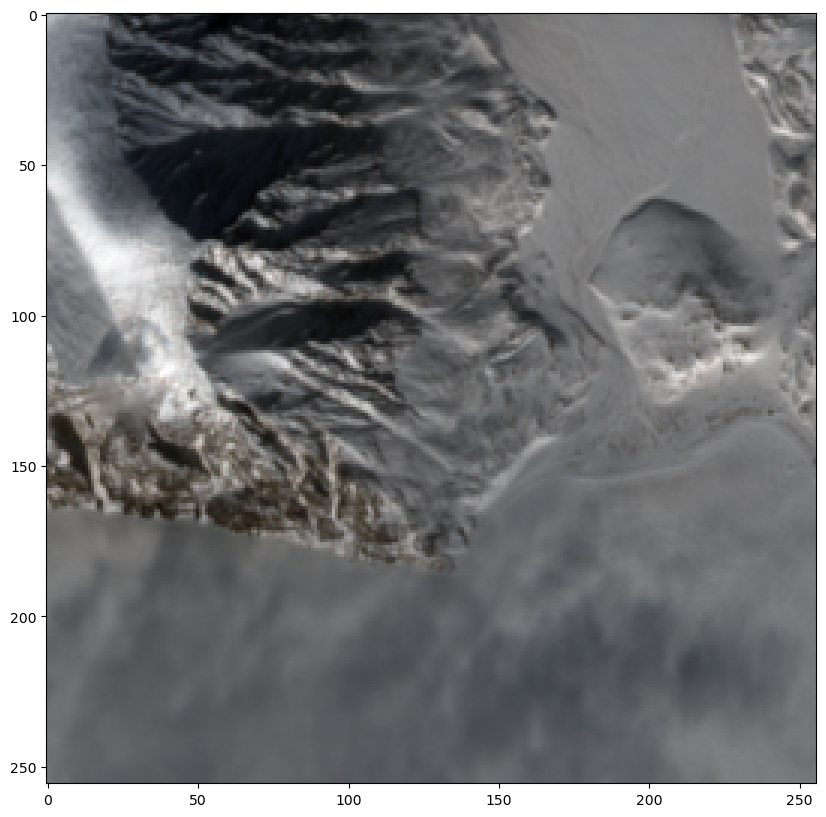

In [20]:
snap_toolbox.plot_tile(temp, 's2')

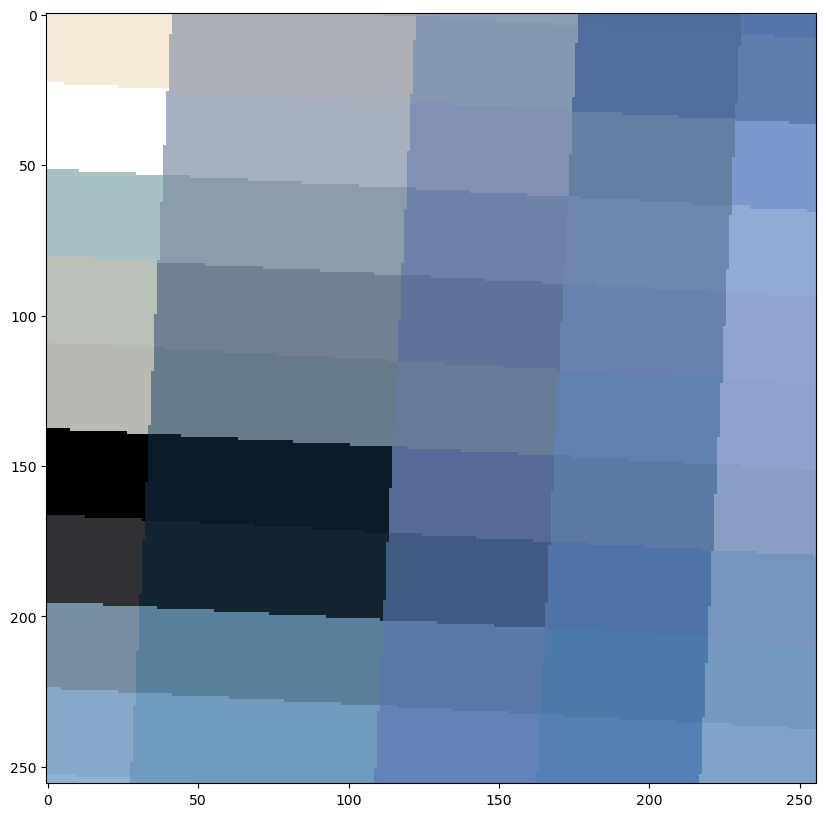

In [21]:
snap_toolbox.plot_tile(temp, 's3')

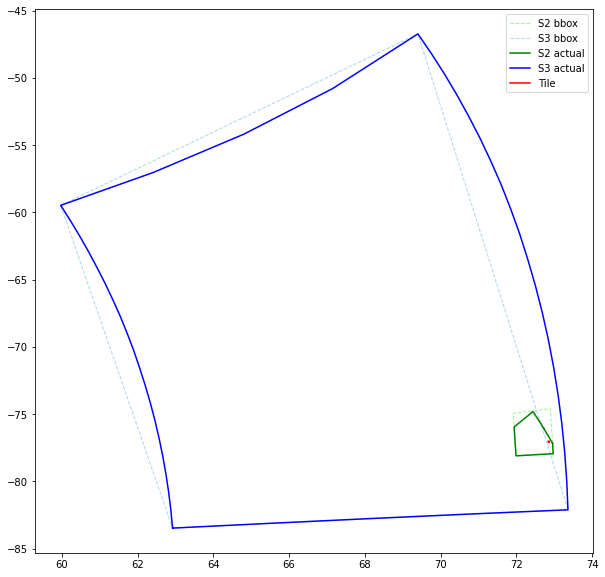

In [27]:
from shapely.geometry import Polygon

polygon_s2 = snap_toolbox.get_bbox_polygon(s2_raw)
polygon_s3 = snap_toolbox.get_bbox_polygon(s3_raw)
polygon_temp = snap_toolbox.get_bbox_polygon(temp)


fig, ax = plt.subplots(figsize=(10,10))

# Plot the polygons
ax.plot(*polygon_s2.exterior.xy, color='palegreen', linestyle='dashed', linewidth=1, label='S2 bbox')
ax.plot(*polygon_s3.exterior.xy, color='lightblue', linestyle='dashed', linewidth=1, label='S3 bbox')
ax.plot(*polygon_real_s2.exterior.xy, color='green', label='S2 actual')
ax.plot(*polygon_real_s3.exterior.xy, color='blue', label='S3 actual')
ax.plot(*polygon_temp.exterior.xy, color='red', label='Tile')
# ax.plot(*polygon_s2.intersection(polygon_s3).exterior.xy, color='black', label='joint')
# ax.plot(*polygon_s2.intersection(polygon_s3).envelope.exterior.xy, color='green', label='map')

# Set plot limits
# ax.set_xlim(45, 90)
# ax.set_ylim(-90, -45)
# ax.set_xlim(70, 74)
# ax.set_ylim(-82, -72)

# Add legend
ax.legend()

# Show the plot
plt.show()

In [40]:
print(polygon_real_s2.intersection(polygon_real_s3).area / polygon_real_s2.area)
print(snap_toolbox.check_overlap(s2_raw, s3_raw, 'metadata.s2', 'metadata.s3'))
print(snap_toolbox.check_overlap(s2_raw, s3_raw))


0.9999999999999997
S2B_MSIL1C_20220428T173859_N0400_R098_T17XPA_20220428T205006
S3A_OL_1_EFR____20220428T152128_20220428T152428_20220429T200056_0179_084_339_1800_MAR_O_NT_002.SEN3
0.9999999999999997
0.7705852463402368


In [41]:
collocated = snap_toolbox.band_subset(collocated,'B2,B3,B4,Oa01_radiance,Oa02_radiance,Oa03_radiance,Oa04_radiance,Oa05_radiance,Oa06_radiance,Oa07_radiance,Oa08_radiance,Oa09_radiance,Oa10_radiance,Oa11_radiance,Oa12_radiance,Oa13_radiance,Oa14_radiance,Oa15_radiance,Oa16_radiance,Oa17_radiance,Oa18_radiance,Oa19_radiance,Oa20_radiance,Oa21_radiance,B_opaque_clouds,quality_flags,collocationFlags')


In [95]:
temp = snap_toolbox.region_subset(collocated, '1000,1000,960,960')

In [85]:
ProductIO.writeProduct(temp, '/home/cb/sis2/data/temp4.tif', 'GeoTIFF')

In [96]:
band = temp.getBand('Oa17_radiance')
# band = collocated.getBand('B2')
width = band.getRasterWidth()
height = band.getRasterHeight()
nparray = np.zeros(100*100, dtype=np.float32)
band.readPixels(0,0,100,100,nparray)

max_value = np.max(nparray)
count = np.count_nonzero(nparray == max_value)

print(max_value)
print(count / nparray.size)
    
min_value = np.min(nparray)
count = np.count_nonzero(nparray == min_value)

print(min_value)
print(count / nparray.size)

# nparray.shape = (height,width)

# snap.plot_s3_tile(collocated)


132.48495
0.0371
131.68137
0.0101


In [20]:

s2_raw.dispose()
s3_raw.dispose()
s2_bands.dispose()
s3_bands.dispose()


In [21]:
temp = snap_toolbox.region_subset(collocated, '0,0,200,200')

In [22]:
ProductIO.writeProduct(temp, '/home/cb/sis2/data/temp2.tif', 'GeoTIFF')

In [22]:
# tile_list, quality_list = snap.cut_tiles(collocated, TILESIZE, PAIR_INDEX, PATH_DATA)
# tile_inventory.head(50)
# tile_inventory[tile_inventory['status'] == 'ok']


In [26]:
img_pairs_inventory.loc[PAIR_INDEX, 'status'] = 'tifs created'


In [28]:
img_pairs_inventory.to_csv(os.path.join(PATH_DATA, 'inventory/img_pairs.csv'))

In [23]:
tile_list.keys()

dict_keys(['20x20', '20x1018', '20x2016', '20x3014', '1018x20', '1018x1018', '1018x2016', '2016x1018', '3014x20', '3014x1018', '4012x20'])

In [ ]:
file_inventory.at[PAIR_INDEX, f'status_{TILESIZE}'] = 'created'


In [110]:
tile_inventory.head(50)

,img_index,tile,size,status,comment,filename
0,00004,20x20,960,ok,,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...
1,00004,20x1018,960,ok,,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...
2,00004,20x2016,960,ok,,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...
3,00004,20x3014,960,ok,,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...
4,00004,20x4012,960,quality,cloud coverage: 76%,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...
5,00004,20x5010,960,quality,cloud coverage: 94%,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...
6,00004,20x6008,960,quality,cloud coverage: 93%,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...
7,00004,20x7006,960,quality,cloud coverage: 100%,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...
8,00004,20x8004,960,quality,black proportion: 33%,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...
9,00004,20x9002,960,quality,black proportion: 91%,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...


In [41]:
# tile = tile_list[list(tile_list.keys())[15]]
tile = quality_list['20x4012']

In [18]:
import importlib
importlib.reload(snap_toolbox)


<module 'snap' from '/home/cb/sis2/preprocessing/snap.py'>

In [20]:
# Reading raw images
s2_raw = ProductIO.readProduct(S2_FILE)
s3_raw = ProductIO.readProduct(S3_FILE)


In [22]:
snap_toolbox.plot_s3_tile(collocated)


RuntimeError: java.lang.IllegalArgumentException: [sourceGeoCoding] is null